B. El modelo posee 9 parámetros desconocidos, seis pesos, a cada neurona le corresponde dos de esos pesos. Además, hay tres biases, de los cuales corresponde uno por neurona.

C. Entre los hiper-parametros se encuentra las funciones de activación seleccionados, junto con el learning rate (LR).

Al modificar el LR se altera la velocidad con que aprende el modelo, un LR muy elevado provoca que el descenso del gradiente sea mas acelerado, lo que puede provocar que no se alcance el mínimo global. Por lo demás, un LR muy bajo provocara que el aprendizaje se dé muy lento, y al realizarse modificaciones muy conservadoras no es posible para el modelo alcanzar el mínimo global.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w_1_11,w_1_12,w_1_21,w_1_22,w_2_11,w_2_12=np.random.uniform(1,0,6)
b_1_1,b_1_2,b_2_1=np.random.uniform(1,0,3)
np.random.seed(1)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X=np.array([[1,1],[1,0],[0,1],[0,0]])
Y=np.array([[0],[1],[1],[0]])
lr=0.001

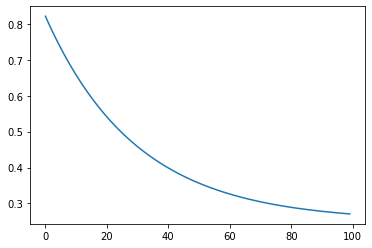

In [2]:
error_epochs=[]
for epoch in range(100):
    error_batch=[]
    for batch in range(4):
        z_1_1=w_1_11*X[batch,0]+w_1_12*X[batch,1]+b_1_1
        z_1_2=w_1_21*X[batch,0]+w_1_22*X[batch,1]+b_1_2
        a_1_1=sigmoid(z_1_1)
        a_1_2=sigmoid(z_1_2)
        z_2_1=w_2_11*a_1_1 + w_2_12*a_1_2 + b_2_1

        error=(z_2_1-Y[batch])**2
        error_batch.append(error)
        
        dCo_da_2_1=2*(z_2_1-Y[batch])
        dz_2_1_da_1=w_2_11
        dz_2_1_da_2=w_2_12
        da_1_dz_1_1=sigmoid(z_1_1) * (1 - sigmoid(z_1_1))
        da_1_dz_1_2=sigmoid(z_1_2) * (1 - sigmoid(z_1_2))
        b_2_1=b_2_1-(lr*dCo_da_2_1)
        w_2_11=w_2_11-(lr*dCo_da_2_1*a_1_1)
        w_2_12=w_2_12-(lr*dCo_da_2_1*a_1_2)
        b_1_1=b_1_1-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1)
        b_1_2=b_1_2-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2)
        w_1_11=w_1_11-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1*X[batch,0])
        w_1_12=w_1_12-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1*X[batch,1])
        w_1_21=w_1_21-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2*X[batch,0])
        w_1_22=w_1_22-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2*X[batch,1])
        
    error_epoch=np.sum(error_batch)*0.25
    error_epochs.append(error_epoch)
# print(error_batch[0])
plt.plot(error_epochs)
plt.show()

In [7]:
X_test=np.array([[1,1],[1,0],[0,1],[0,0]])
Y_test=np.array([[0],[1],[1],[0]])
error_test=[]
for i in range(4):
    z_1_1=w_1_11*X_test[i,0]+w_1_12*X_test[i,1]+b_1_1
    z_1_2=w_1_21*X_test[i,0]+w_1_22*X_test[i,1]+b_1_2
    a_1_1=sigmoid(z_1_1)
    a_1_2=sigmoid(z_1_2)
    z_2_1=w_2_11*a_1_1 + w_2_12*a_1_2 + b_2_1
    error=(z_2_1-Y_test[i])**2
    error_test.append(error)
print("MSE:", np.sum(error_test)*0.25)

MSE: 0.26917488687652613
